# **Project Name**    - Customer Churn Prediction 

![bank](1.png)

##### **Project Type**    - Customer Churn Prediction using Artificial Neural Networks (ANN)
##### **Contribution**    - Individual
##### **Member 1 - Sreenivasulu**

## **Project Summary**

Customer churn—the phenomenon where customers stop using a company’s product or service—is a critical challenge for businesses across industries. Predicting which customers are likely to churn allows companies to proactively engage and retain valuable clients, reducing revenue loss and improving customer satisfaction.

# Business problem understand

- predict the whether customer stayed or existed

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# collect and load the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
# let's check how data is look likes
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# exploratory data analysis

In [4]:
# let's see how many rows and colums
print(f'nomber of rows: {df.shape[0]}\nnumber of colums: {df.shape[1]}')

nomber of rows: 10000
number of colums: 14


In [5]:
# to check for dupliacte values in data
df.duplicated().sum()

np.int64(0)

In [6]:
# to check are there any null values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# drop unnecessary columns
df =df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [8]:
## extract the cat and num columns
cat_col=[col for col in df.columns if df[col].dtype=="object"]
num_col=[col for col in df.columns if df[col].dtype!="object"]

In [9]:
cat_col

['Geography', 'Gender']

## Visualization for categorical columns

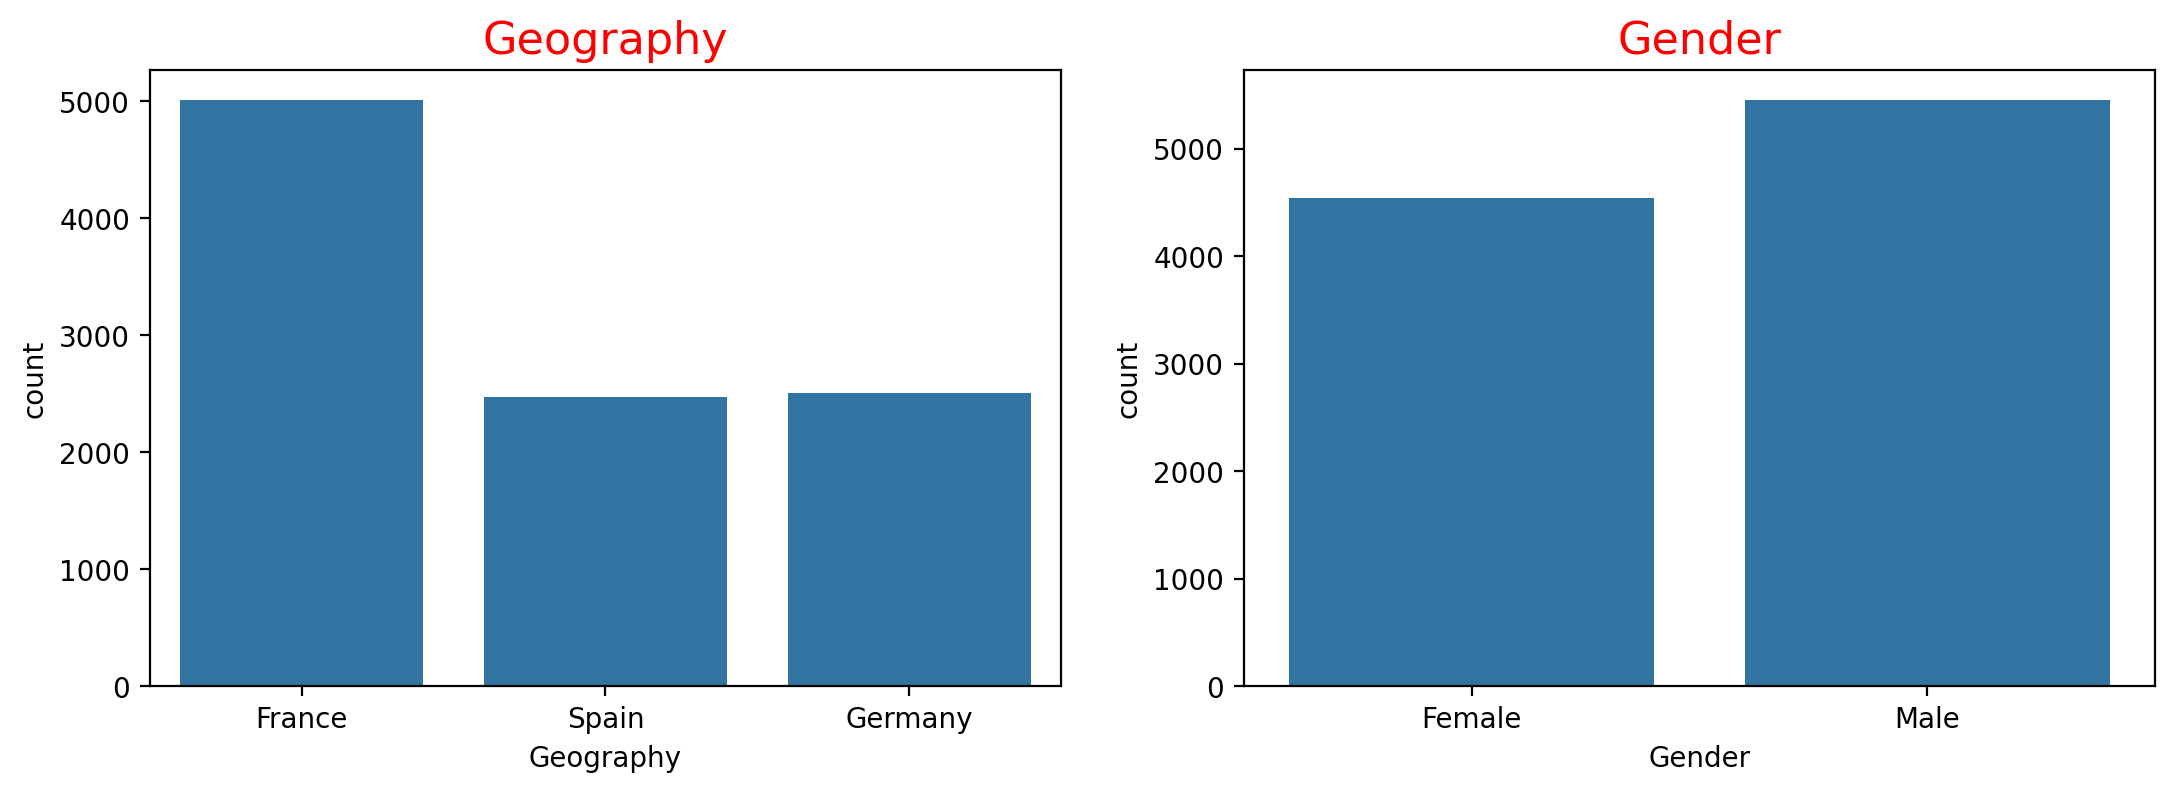

In [10]:
plt.figure(figsize=(20,4),dpi=200)
for i,feature in enumerate(cat_col):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df[feature])
    plt.title(feature,fontsize=16,color="red")
plt.show()

In [11]:
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

## Visualization for numerical columns

<function matplotlib.pyplot.show(close=None, block=None)>

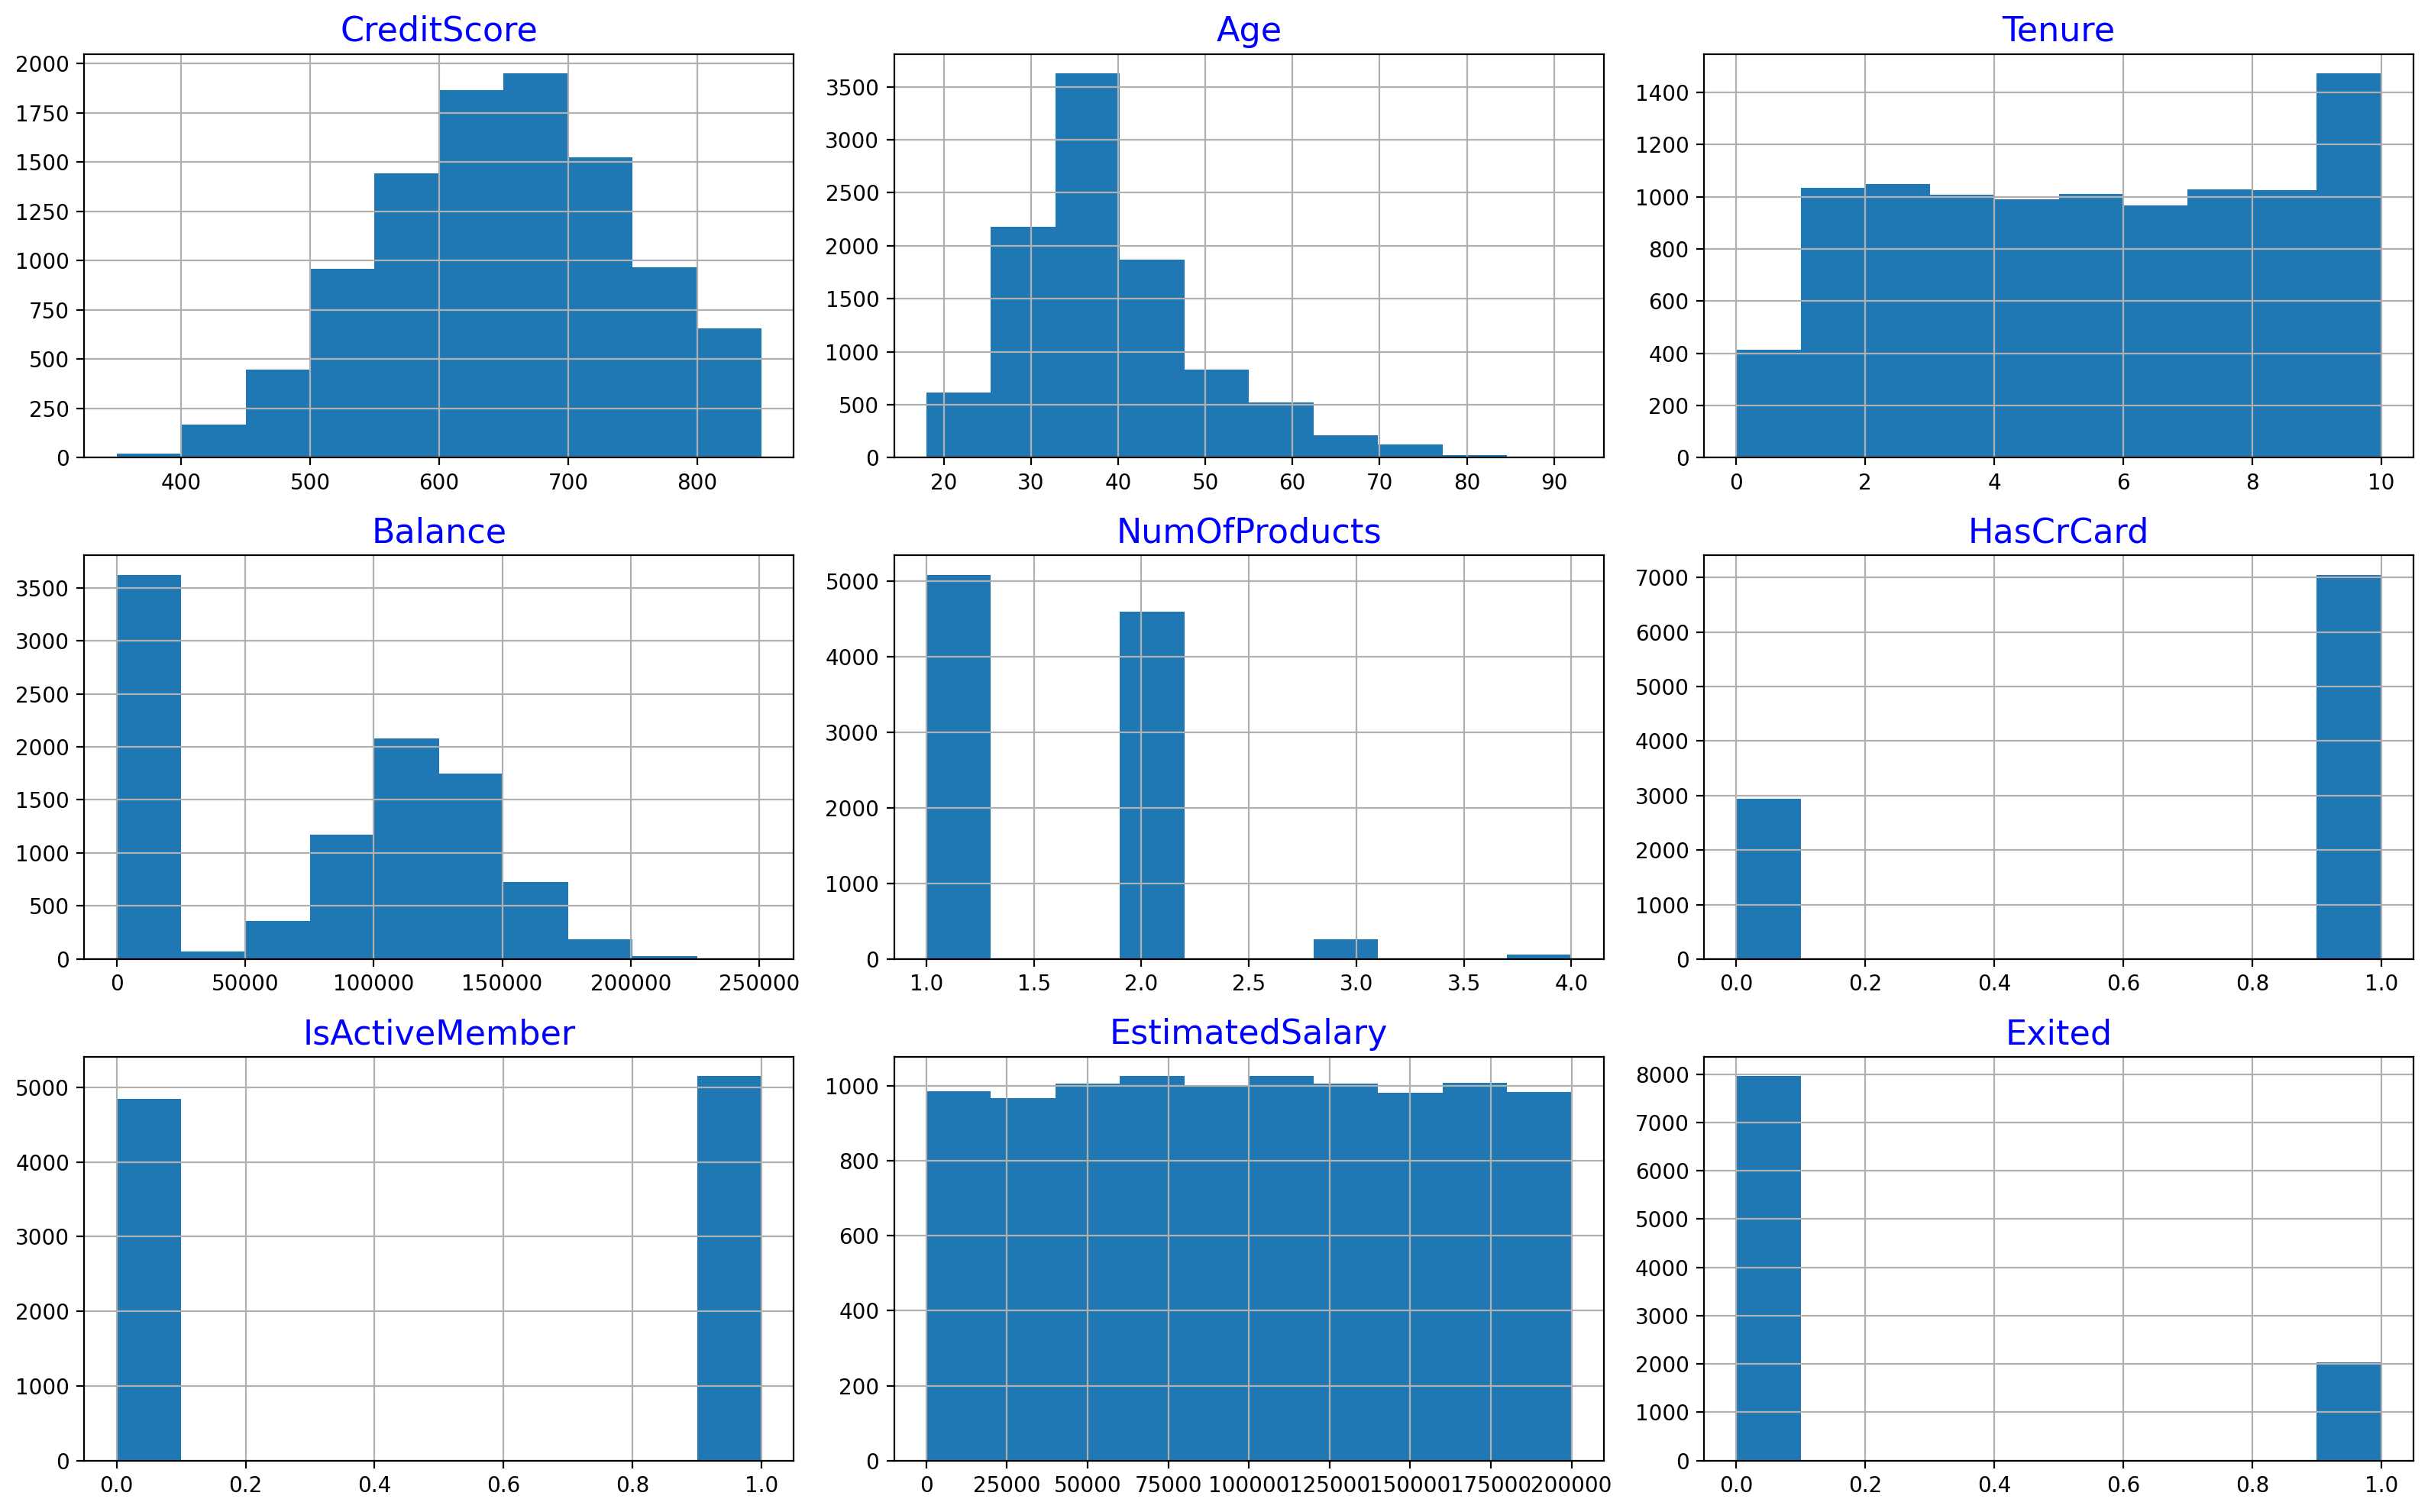

In [12]:
plt.figure(figsize=(16,10),dpi=200)

for i,feature in enumerate (num_col):
    plt.subplot(3,3, i+1)
    df[feature].hist()
    plt.title(feature,fontsize=16,color="Blue")
    plt.tight_layout()
plt.show

## Vusualization for Existed 

Exited
0    7963
1    2037
Name: count, dtype: int64

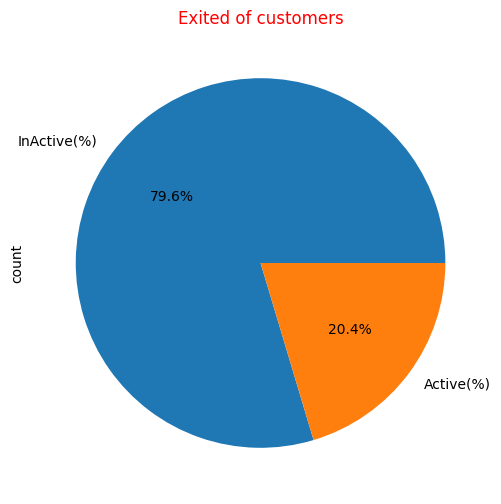

In [13]:
df['Exited'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.1f%%",shadow=False,labels=['InActive(%)','Active(%)'])
plt.title('Exited of customers',color='red');

# count of Target variable
df['Exited'].value_counts()

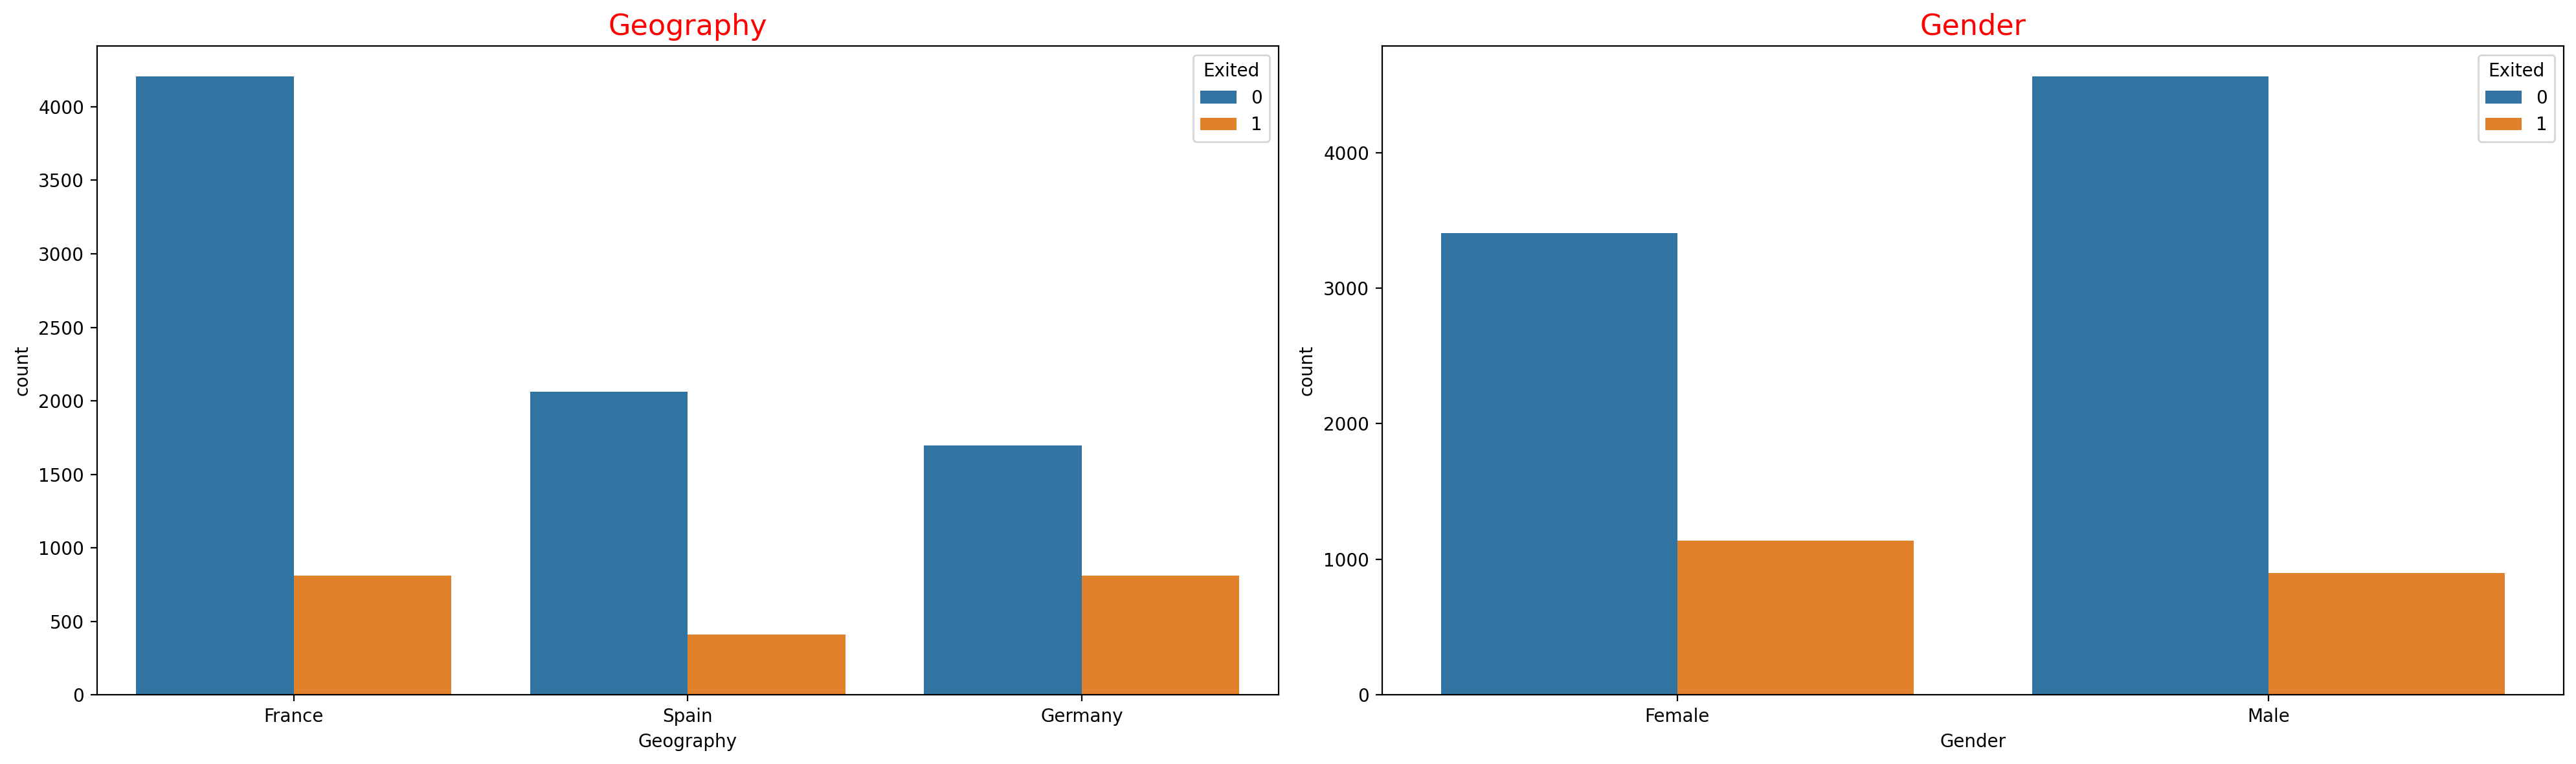

In [14]:
# Analysing the distribution of categorical variables in the dataset

plt.figure(figsize=(20,6),dpi=200)

for i, feature in enumerate(cat_col):
  plt.subplot(1, len(cat_col), i+1)
  sns.countplot(x=df[feature], hue='Exited', data=df)
  plt.title(feature, fontsize=16, color='red')
  plt.tight_layout()

### One Hot Encoding

In [15]:
df = pd.get_dummies(df, columns=["Gender","Geography"],drop_first=True)
df.astype(int)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0
9996,516,35,10,57369,1,1,1,101699,0,1,0,0
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,1,0


### Data Spliting

In [16]:
x = df.drop("Exited",axis=1)
y = df["Exited"]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=45)
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
4643,597,60,0,131778.08,1,0,0,10703.53,False,False,False
2390,602,32,7,184715.86,2,1,0,113781.99,True,True,False
6162,748,34,5,84009.47,1,1,1,137001.10,True,False,False
8678,518,28,9,85146.36,1,0,0,2803.89,False,False,False
6944,850,36,7,102800.72,1,1,1,87352.43,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
8772,768,30,6,0.00,2,1,1,199454.37,True,False,False
163,721,36,2,0.00,2,1,1,106977.80,False,False,True
6012,738,26,3,0.00,2,1,0,67484.16,False,False,False
6558,686,38,0,138131.34,1,0,1,115927.85,True,False,False


### Feature scaling (Standardizatin scaling)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## Building ANN Model Architecture

In [19]:
# how many features are there after preprocssing the data we have 11 feature

import tensorflow 
from tensorflow.keras import Sequential         ## Order to connect neurons
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model

In [20]:
model=Sequential()    # Initial (0)
model.add(Dense(units=5,input_dim=11,activation="relu"))  # 5 = Nest neurans
model.add(Dense(units=10,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:

!pip install pydot graphviz


Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Graphy
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [23]:
## Compiler
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  # Adm = Gradient Desert

In [24]:
# fit on train data 

history = model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7575 - loss: 0.5895 - val_accuracy: 0.7987 - val_loss: 0.5160
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7975 - loss: 0.4913 - val_accuracy: 0.7987 - val_loss: 0.4669
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7983 - loss: 0.4564 - val_accuracy: 0.8006 - val_loss: 0.4472
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8047 - loss: 0.4394 - val_accuracy: 0.8119 - val_loss: 0.4362
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8127 - loss: 0.4283 - val_accuracy: 0.8169 - val_loss: 0.4308
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8181 - loss: 0.4224 - val_accuracy: 0.8206 - val_loss: 0.4277
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8213 - loss: 0.4185 - val_accuracy: 0.8194 - val_loss: 0.4241
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8239 - loss: 0.4153 - val_accuracy: 0.

## Predict on the test data

In [25]:
ypred_test = model.predict(x_test)

ypred_test = np.where(ypred_test> 0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [26]:
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))

Test Accuracy :  0.8615


## Accurcy_Curve

In [27]:
import plotly.express as px

plt.figure(figsize=(10,6))
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1,51)

accuracy = pd.DataFrame({"train_acc":train_accuracy,"val_acc":val_accuracy})

<Figure size 1000x600 with 0 Axes>

In [28]:
accuracy.head(5)

,train_acc,val_acc
0,0.757500,0.798750
1,0.797500,0.798750
2,0.798281,0.800625
3,0.804688,0.811875
4,0.812656,0.816875


In [29]:
# Plot
fig = px.line(data_frame=accuracy, x=epochs, y=["train_acc","val_acc"], title="Training and valiadion accuracy",template="plotly_dark")
fig.show()

## 📝 Conclusion

This Customer Churn Prediction project successfully demonstrated how Artificial Neural Networks (ANN) can be leveraged to effectively identify customers who are likely to leave a service. With an achieved accuracy of around 86%, the model provides a reliable tool for businesses to anticipate churn and take proactive measures.

